In [197]:
# importing necessary libraries
import random
random.seed(123)
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


import numpy as np
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras.losses import Huber



In [198]:
# importing already cleaned dataset
dataset1 = pd.read_csv('new_all_df.csv', error_bad_lines=False, encoding = 'latin')

In [199]:
#dataset1 = dataset1[dataset1['State']=='NY']

In [200]:
# calculating total sales by grouping posting date

dataset1=dataset1.groupby(['Posting Date'], as_index=False)['Total Sales $'].sum()


In [201]:
dataset1

,Posting Date,Total Sales $
0,2018-02-03,104.25
1,2018-02-05,41.70
2,2018-02-06,208.50
3,2018-02-07,646.35
4,2018-02-08,291.90
...,...,...
886,2021-02-23,281.40
887,2021-02-24,174.40
888,2021-02-25,140.70
889,2021-02-26,331.60


In [202]:
# saving date for further use in a parameter

traindate = pd.to_datetime(dataset1['Posting Date'],format='%Y-%m-%d')

# drop null values from dataset
dataset1.dropna(inplace=True)



In [203]:
# droping dates and saving into another datset for model building
dataset=dataset1.drop(columns='Posting Date')

from scipy import stats
dataset= dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [204]:
 dataset

array([[0.07608823],
       [0.03043529],
       [0.15217645],
       [0.471747  ],
       [0.21304703],
       [0.51739994],
       [0.22826468],
       [0.471747  ],
       [0.31957055],
       [0.45652936],
       [0.15217645],
       [0.18261174],
       [0.19782939],
       [0.09130587],
       [0.31957055],
       [0.39565877],
       [0.03043529],
       [0.15217645],
       [0.24348232],
       [0.31957055],
       [0.04565294],
       [0.15217645],
       [0.10652352],
       [0.18261174],
       [0.06087058],
       [0.15217645],
       [0.07608823],
       [0.04565294],
       [0.09130587],
       [0.1673941 ],
       [0.03043529],
       [0.07608823],
       [0.07608823],
       [0.07608823],
       [0.09130587],
       [0.13695881],
       [0.13695881],
       [0.07608823],
       [0.27391761],
       [0.09130587],
       [0.04565294],
       [0.09130587],
       [0.06087058],
       [0.15217645],
       [0.07608823],
       [0.15217645],
       [0.06087058],
       [0.060

In [205]:
# declaring list objects to identify feature and target 
trainX=[]
trainY= []

In [206]:
n_future= 10 # number of days to be predicted
n_past= 100 # number of past days included for prediction 

In [207]:
# saving values for feature and target value

for i in range(n_past,len(dataset)-n_future+1):
    trainX.append(dataset[i-n_past:i,0:dataset.shape[1]])
    trainY.append(dataset[i+n_future-1:i+n_future,-1])

trainX, trainY = np.array(trainX),np.array(trainY)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_106 (LSTM)              (None, 100, 50)           10400     
_________________________________________________________________
lstm_107 (LSTM)              (None, 32)                10624     
_________________________________________________________________
dropout_53 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 21,057
Trainable params: 21,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1500
10/10 - 4s - loss: 0.0484 - accuracy: 0.0014 - val_loss: 0.0665 - val_accuracy: 0.0000e+00
Epoch 2/1500
10/10 - 1s - loss: 0.0483 - accuracy: 0.0014 - val_loss: 0.0665 - val_accuracy: 0.0000e+00
Epoch 3/1500
10/10 - 1s - loss: 0.0484 

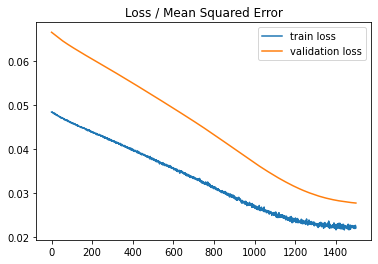

In [208]:

# design network

opt = keras.optimizers.Adam(lr=0.000001)
model = Sequential()
model.add(LSTM(50,activation= 'relu' ,return_sequences=True,input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(32,activation= 'relu',return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mse', optimizer=opt,metrics=['accuracy'])
model.summary()
# fit network
history = model.fit(trainX, trainY, epochs=1500, batch_size=72, validation_split=0.1, verbose=2, shuffle=False)
# plot history
plt.title('Loss / Mean Squared Error')

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [209]:
n_future=90
forecast_perioddate= pd.date_range(list(traindate)[-1],periods=n_future, freq='1d')

In [210]:
forecast=model.predict(trainX[-n_future:])

In [211]:
forecast

array([[0.17161717],
       [0.17100908],
       [0.16963285],
       [0.16966996],
       [0.16978215],
       [0.16980806],
       [0.16924962],
       [0.1701514 ],
       [0.1696901 ],
       [0.16998638],
       [0.17017357],
       [0.17164338],
       [0.17276947],
       [0.17404674],
       [0.17363562],
       [0.17333776],
       [0.17316547],
       [0.17230262],
       [0.17230542],
       [0.17186333],
       [0.17200153],
       [0.17122741],
       [0.16940193],
       [0.1672595 ],
       [0.16593006],
       [0.1695282 ],
       [0.176738  ],
       [0.18117173],
       [0.18426852],
       [0.18662542],
       [0.18639164],
       [0.18605705],
       [0.18559867],
       [0.1864257 ],
       [0.18855287],
       [0.18838498],
       [0.18716161],
       [0.18805473],
       [0.18841608],
       [0.18889229],
       [0.19041283],
       [0.18964075],
       [0.18785752],
       [0.18683828],
       [0.18530062],
       [0.18461348],
       [0.18280053],
       [0.180

In [212]:
forecast_copies=np.repeat(forecast,dataset.shape[1],axis=-1)
y_predfuture= scaler.inverse_transform(forecast_copies)[:,0]

In [213]:
y_predfuture

array([235.13611, 234.30296, 232.41736, 232.4682 , 232.62192, 232.65742,
       231.89229, 233.12784, 232.4958 , 232.90175, 233.15822, 235.17203,
       236.7149 , 238.46492, 237.90163, 237.49353, 237.25748, 236.07526,
       236.0791 , 235.47339, 235.66273, 234.6021 , 232.10097, 229.16559,
       227.3441 , 232.27397, 242.15227, 248.227  , 252.46999, 255.69922,
       255.3789 , 254.92049, 254.29245, 255.42558, 258.34006, 258.11002,
       256.43387, 257.65753, 258.15265, 258.8051 , 260.88843, 259.83057,
       257.38736, 255.99088, 253.88408, 252.94263, 250.45866, 247.13274,
       245.71542, 242.96114, 239.0237 , 235.75691, 232.14558, 229.42323,
       229.04765, 227.60143, 226.00876, 225.01596, 223.34276, 220.48572,
       219.04529, 216.57042, 213.74011, 213.12051, 211.41953, 208.68011,
       207.38992, 206.40303, 205.59683, 206.12473, 205.1919 , 204.53241,
       204.67256, 203.86447, 202.05861, 201.7327 , 201.26302, 199.61652,
       199.28078, 198.1509 , 198.62122, 200.72885, 

In [214]:
forecast_dates= []

for time_i in forecast_perioddate:
    forecast_dates.append(time_i.date())


In [215]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates),'sales':y_predfuture})

In [216]:
df_forecast

,date,sales
0,2021-02-27,235.136108
1,2021-02-28,234.302963
2,2021-03-01,232.417358
3,2021-03-02,232.468201
4,2021-03-03,232.621918
...,...,...
85,2021-05-23,208.636749
86,2021-05-24,211.115662
87,2021-05-25,215.628540
88,2021-05-26,219.341858


In [217]:
df_forecast['date']=pd.to_datetime(df_forecast['date'])

In [218]:
original= dataset1[['Posting Date','Total Sales $']]
original['date']=pd.to_datetime(original['Posting Date'])
original=original.loc[original['date']>'2021-01-01']

In [219]:
original

,Posting Date,Total Sales $,date
842,2021-01-02,180.99,2021-01-02
843,2021-01-04,113.59,2021-01-04
844,2021-01-05,199.80,2021-01-05
845,2021-01-06,422.16,2021-01-06
846,2021-01-07,144.45,2021-01-07
847,2021-01-08,186.79,2021-01-08
848,2021-01-09,282.40,2021-01-09
849,2021-01-11,134.11,2021-01-11
850,2021-01-12,60.30,2021-01-12
851,2021-01-13,250.51,2021-01-13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


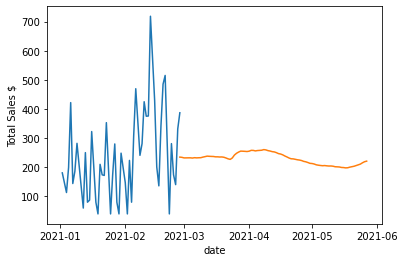

In [220]:
sns.lineplot(original['date'],original['Total Sales $'])
sns.lineplot(df_forecast['date'],df_forecast['sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([737850., 737864., 737881., 737895., 737911., 737925.]),
 <a list of 6 Text major ticklabel objects>)

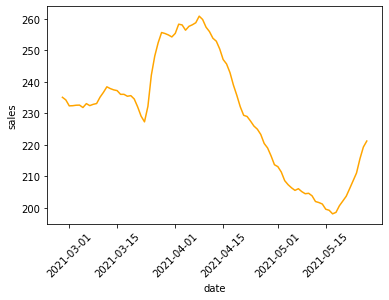

In [221]:
g= sns.lineplot(df_forecast['date'],df_forecast['sales'],color='orange')
plt.xticks(rotation=45)

#g.set_xticklabels(rotation=30)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


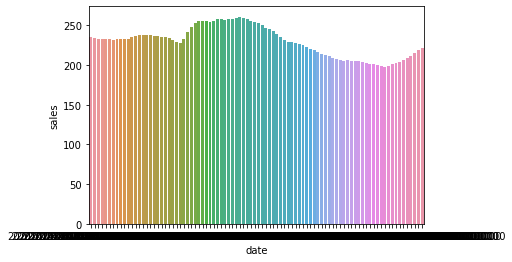

In [222]:
sns.barplot(df_forecast['date'],df_forecast['sales'])

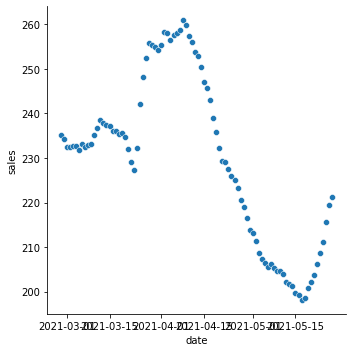

In [223]:
sns.relplot(x="date", y="sales", data=df_forecast);

In [224]:
evaluate_forecasts(original,df_forecast)

NameError: ignored